# Preprocess mHSPC datasets

## Library imports

In [1]:
import scanpy as sc
import scvelo as scv
from velovi import preprocess_data

from rgv_tools import DATA_DIR

/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_t

## General settings

In [2]:
sc.settings.verbosity = 2
scv.settings.verbosity = 3

## Constants

In [3]:
DATASET = "mHSPC"

In [4]:
SAVE_DATA = True
if SAVE_DATA:
    (DATA_DIR / DATASET / "processed").mkdir(parents=True, exist_ok=True)

## Data loading

In [6]:
adata_velo = sc.read_loom(DATA_DIR / DATASET / "raw" / "Nestorowa.loom")
adata_p = sc.read_h5ad(DATA_DIR / DATASET / "raw" / "adata_nestorowa.h5ad")

In [7]:
adata_p.obs

,cell_IDs,cell_types_IDs,cell_types_broad,cell_types_fine,cell_types_broad_cleaned,n_counts,n_genes,mito_ratio,initial_size_spliced,initial_size_unspliced,initial_size,size_factors_x,size_factors_s,size_factors_u,leiden,velocity_self_transition
SRR3558184,HSPC_001_rep,HSPC,"MPP_broad, STHSC_broad",None,MPP_broad,1404060.0,5826,0.0,1404060,224383,1404060.0,2.722215,2.722215,2.770269,1,0.113736
SRR3558185,HSPC_002_rep,HSPC,LTHSC_broad,LTHSC,LTHSC_broad,130334.0,4730,0.0,130334,19788,130334.0,0.242590,0.242590,0.211278,1,0.106622
SRR3558186,HSPC_003_rep,HSPC,"MPP_broad, MPP3_broad",None,MPP_broad,627148.0,6372,0.0,627148,84188,627148.0,1.043037,1.043037,1.068530,3,0.022092
SRR3558187,HSPC_004_rep,HSPC,LMPP_broad,LMPP,LMPP_broad,317301.0,5536,0.0,317301,54361,317301.0,0.548139,0.548139,0.602953,0,0.158245
SRR3558189,HSPC_006_rep,HSPC,LMPP_broad,LMPP,LMPP_broad,335563.0,6270,0.0,335563,62426,335563.0,0.612579,0.612579,0.806794,0,0.147797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3560099,Prog_848_rep,Prog,GMP_broad,GMP,GMP_broad,194009.0,5750,0.0,194009,39021,194009.0,0.340196,0.340196,0.453426,9,0.174135
SRR3560100,Prog_849_rep,Prog,CMP_broad,CMP,CMP_broad,240624.0,5787,0.0,240624,32157,240624.0,0.442644,0.442644,0.396637,6,0.084609
SRR3560101,Prog_850_rep,Prog,MEP_broad,None,MEP_broad,608044.0,7619,0.0,608044,41827,608044.0,0.868808,0.868808,0.641310,2,0.010177
SRR3560102,Prog_851_rep,Prog,CMP_broad,CMP,CMP_broad,323195.0,6473,0.0,323195,86099,323195.0,0.534781,0.534781,1.087060,6,0.129851


## Preprocessing

In [8]:
adata_velo.obs_names[:5]

Index(['onefilepercell_SRR3556264Aligned_and_others_KPB9A:SRR3556264Aligned.out.bam',
       'onefilepercell_SRR3556264Aligned_and_others_KPB9A:SRR3556265Aligned.out.bam',
       'onefilepercell_SRR3556264Aligned_and_others_KPB9A:SRR3556266Aligned.out.bam',
       'onefilepercell_SRR3556264Aligned_and_others_KPB9A:SRR3556267Aligned.out.bam',
       'onefilepercell_SRR3556264Aligned_and_others_KPB9A:SRR3556268Aligned.out.bam'],
      dtype='object', name='CellID')

In [9]:
adata_velo.obs_names = [
    i.replace("onefilepercell_SRR3556264Aligned_and_others_KPB9A:", "") for i in adata_velo.obs_names
]
adata_velo.obs_names = [i.replace("Aligned.out.bam", "") for i in adata_velo.obs_names]

In [10]:
adata_velo = adata_velo[adata_p.obs_names].copy()

In [11]:
adata_velo.obs_names = adata_p.obs["cell_IDs"]
adata_velo.obs_names = [i.replace("_rep", "") for i in adata_velo.obs_names]

In [12]:
adata_velo.obs_names

Index(['HSPC_001', 'HSPC_002', 'HSPC_003', 'HSPC_004', 'HSPC_006', 'HSPC_008',
       'HSPC_009', 'HSPC_011', 'HSPC_012', 'HSPC_013',
       ...
       'Prog_843', 'Prog_844', 'Prog_845', 'Prog_846', 'Prog_847', 'Prog_848',
       'Prog_849', 'Prog_850', 'Prog_851', 'Prog_852'],
      dtype='object', length=1772)

In [13]:
adata_velo.var_names_make_unique()

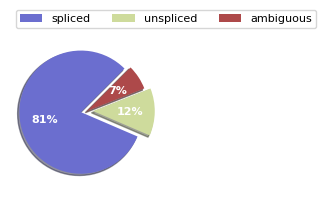

In [14]:
scv.pl.proportions(adata_velo)

In [15]:
scv.pp.filter_and_normalize(adata_velo, min_shared_counts=20, n_top_genes=3000)

Filtered out 18356 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
Logarithmized X.


/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


In [16]:
adata_velo.obs_names = [i.replace("-", "_") for i in adata_velo.obs_names]

## Processing Dataset

In [17]:
adata_subset = adata_velo.copy()
## set annotation
adata_p.obs_names = adata_velo.obs_names
adata_subset.obs = adata_p.obs

print(adata_subset)

## Velocity pipeline
sc.tl.pca(adata_subset)
sc.pp.neighbors(adata_subset, n_neighbors=30, n_pcs=30)
scv.pp.moments(adata_subset)
adata_subset = preprocess_data(adata_subset, filter_on_r2=True)

if SAVE_DATA:
    adata_subset.write_h5ad(DATA_DIR / DATASET / "processed" / "mHSC_ExpressionData.h5ad")

AnnData object with n_obs × n_vars = 1772 × 3000
    obs: 'cell_IDs', 'cell_types_IDs', 'cell_types_broad', 'cell_types_fine', 'cell_types_broad_cleaned', 'n_counts', 'n_genes', 'mito_ratio', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'size_factors_x', 'size_factors_s', 'size_factors_u', 'leiden', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'log1p'
    layers: 'matrix', 'ambiguous', 'spanning', 'spliced', 'unspliced'
computing PCA
    with n_comps=50
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 30


2025-10-25 11:03:55.896387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761383037.019661 1275922 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761383037.440171 1275922 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


    finished (0:01:55)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
